Matt Griffiths (V00752005)

<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


#Assignment 1

## Q1: Simulate aliasing of sinusoidal signals

For this problem you will simulate the phenomena of aliasing.  This will give you pracitice in making synthetic time series, subsetting data, and plotting your results.

**1** To start, make a time vector that goes from 0 to 120 s, with 10000 entries in it.  Then make a synthetic time series that has two close in frequency sine waves:

$$ x = A_1 \cos (\omega t) + A_2 \cos ((\omega_1+\delta \omega ) t) $$

where $\omega$ is the "carrier" frequency, and $\delta \omega << \omega$ is the difference in frequencies between the two waves.  For simplicty, you could make $A_1=A_2=1. [V]$.  Feel free to choose an interesting $\omega$.

<hr>

**2** Now plot the two component waves and the full value of $x$ as a time series.  Preferably on the same axis.  Make sure to label your axes and include a legend<hr>

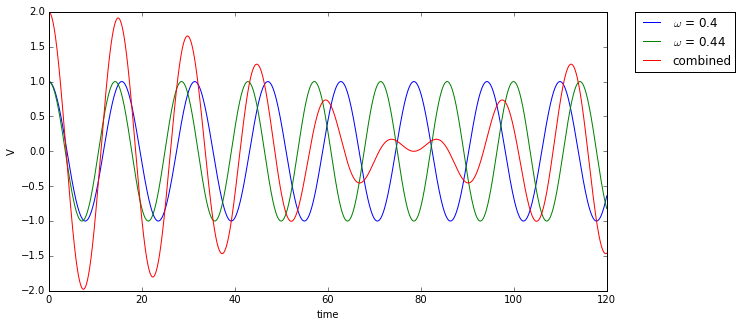

In [2]:
import numpy as np
import scipy as sc
import math as m
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pylab as P
%matplotlib inline

elements = 10000

t = np.linspace(0,120, elements)
dw = 0.04
w = 0.4
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = 0.4')
plt.plot(t, x2, label=r'$\omega$ = 0.44')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

**3** Try a few different values of $\delta\omega$, and compare.<hr>

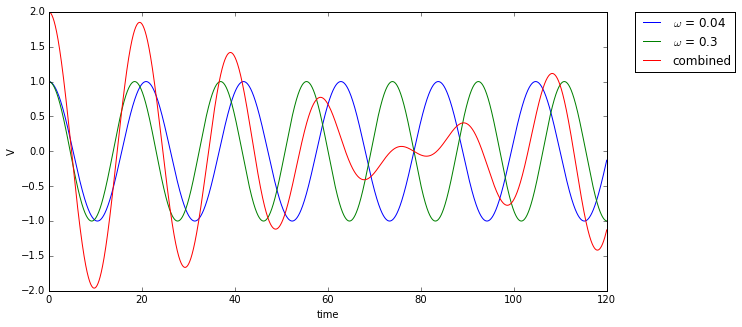

In [3]:
t = np.linspace(0,120, elements)
dw = 0.04
w = 0.3
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = 0.04')
plt.plot(t, x2, label=r'$\omega$ = 0.3')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

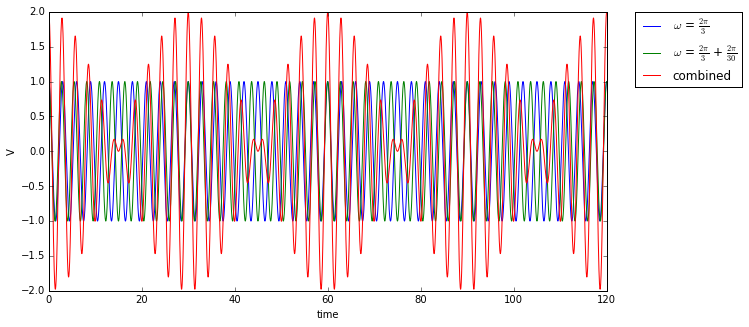

In [4]:
w = 2*m.pi/3
dw = 2*m.pi/30
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = $\frac{2\pi}{3}$')
plt.plot(t, x2, label=r'$\omega$ = $\frac{2\pi}{3}$ + $\frac{2\pi}{30}$')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

**4** Now, just so this works, let me specify some numbers for you.  Make $\omega=\frac{2\pi}{3}$, and $\delta\omega=\omega/10.$.  Plot the original time series, and a subsampled time series that just consists of every 200th point.  In a "Markdown" box below the code (or as a comment) describe the difference in these two signals as quantifiably as you can.  <hr>

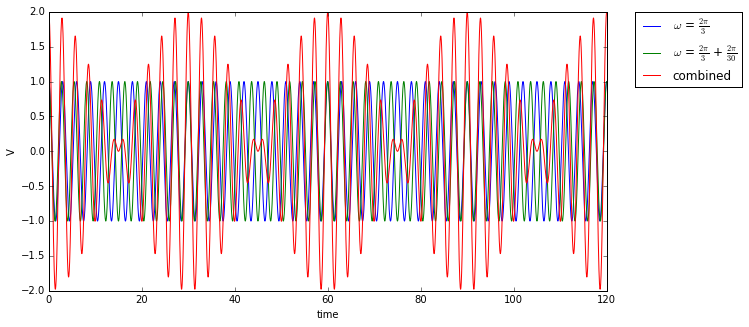

In [5]:
w = 2*m.pi/3
dw = 2*m.pi/30
A1 = 1
A2 = 1

x1 = A1*np.cos(w*t)
x2 = A2*np.cos((w+dw)*t)
x = x1 + x2

plt.figure(figsize=(10,5))
plt.plot(t, x1, label=r'$\omega$ = $\frac{2\pi}{3}$')
plt.plot(t, x2, label=r'$\omega$ = $\frac{2\pi}{3}$ + $\frac{2\pi}{30}$')
plt.plot(t, x, label="combined")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

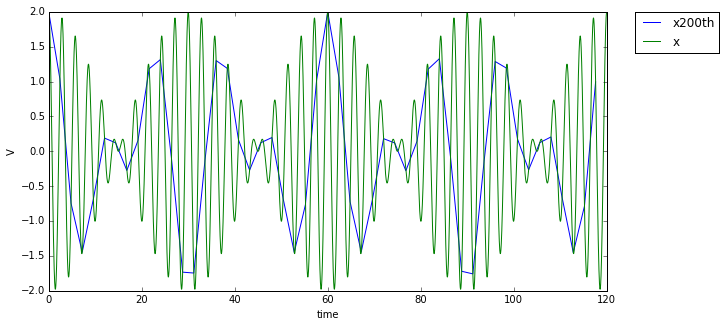

In [6]:
x200th = x[0:elements:200]
t200th = t[0:elements:200]


plt.figure(figsize=(10,5))
plt.plot(t200th, x200th, label="x200th")
plt.plot(t, x, label="x")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time')
plt.ylabel('V')
plt.show()

The modulation frequency is still recognizable, however the carrier frequency is almost lost, you might think the carrier frequency is a third or quarter of what it actually is.

# Q2: Demonstrate the central limit theorem for a very unfair coin flip.

Consider a coin that is twice as likely to come up heads as tails. To put a number on it, call tails $x=-1/2$ and heads $x=+1/2$.  

**1** What are the mean, $\mu_x$, and variance $\sigma_x^2$ of this process?

<hr>

The mean of the coin toss would be:
    $ \frac{1}{2} \frac{2}{3} + \frac{-1}{2} \frac{1}{3} = \frac{1}{6}$

In [17]:
mean = (1.0/3.0) - (1.0/6.0)
var = (2.0/3.0)*(0.5 - mean)**2 + (1.0/3.0)*(-0.5 - mean)**2
print 'mean:\t\t' + str(mean)
print 'varience:\t' + str(var)

mean:		0.166666666667
varience:	0.222222222222


**2** Plot or represent the *probability distribution*  (or cumulative distrubution) of this process.
<hr>

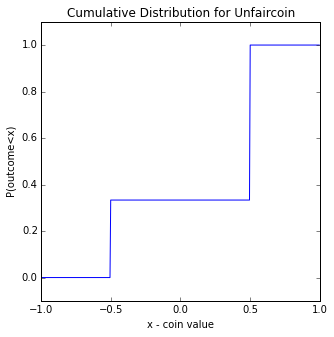

In [21]:
y = np.arange(-1.,1.,0.005)
P = y*0.
for i in range(-1,1,1):
    P[y>(-0.5)]=1./3.
for j in range(0,1,1):
    P[y>(0.5)]=1.
plt.figure(figsize=(5,5))
plt.plot(y,P)
plt.xlabel('x - coin value')
plt.ylabel('P(outcome<x)')
plt.ylim([-0.1,1.1])
plt.xlim([-1,1])
plt.title('Cumulative Distribution for Unfaircoin')

**3** Write a function using the `np.random.rand` function to simulate the coin flip.  It shoudl return $+1/2+$ twice as often as $-1/2$.  Demonstrate that your function works.
<hr>

In [9]:
def unfaircoin(times):
    outcome = np.zeros(times+2)
    dist = np.random.randint(1,100,size=times)
    
#    out2=0.*dist+0.5
 #   out2[(dist%3==0)]=-0.5
#  ind = np.where((dist%3)==0)[0]
    
    for i in range(0,times, 1):
        if dist[i]%3 == 0:
            outcome[0] = outcome[0]+1
            outcome[i+2] = -0.5
        else:
            outcome[1] = outcome[1]+1
            outcome[i+2] = 0.5
    return outcome

**4** Perform $N_{flip}$ and take the sample mean $\overline{x}$ of the values.  Do this 2000 times, and show that as $N_{flip}\to\infty$ the distribution of $\overline{x}$ approaches a Normal distribution by plotting the histograms of the means for each.  For $N_{flip}$ choose 2, 16, 64, 256. 

Comment on how the convergence of $\overline{x}$ for the unfair coin compares to the convergence of the sample mean of the dice roll from the notes.  
<hr>

In [10]:
def mkcmdbar(x, y, ax, tosses):
    #Plot
    ax.bar(x, [y[0], y[1]], 0.2, align='center')
    #Set plot labels
    ax.set_xlabel('n = '+str(tosses))
    ax.set_ylabel('tosses')
    ax.axis([-1., 1, 0, tosses])
    ax.plot([-1., 0.], [tosses/3., tosses/3.], "k--")
    ax.plot([0.,1.], [tosses*2./3., tosses*2./3.], "k--")
    #Return AX
    return ax

def mkhist(ax, tosses, buns):
    z = np.zeros(2000)
    for i in range(0,2000,1):
        z[i] = np.mean(unfaircoin(tosses)[2::1])
    
    #used example histogram code from: http://matplotlib.org/1.2.1/examples/pylab_examples/histogram_demo.html
    n, bins, patches = ax.hist(z, buns, normed=1, facecolor='green', alpha=0.75)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    # add a 'best fit' line for the normal PDF
    y = mlab.normpdf(bincenters, 0.16667, np.std(z))
    l = ax.plot(bincenters, y, 'r--', linewidth=2)
    ax.set_xlabel('n = '+str(tosses))
    ax.set_ylabel('tosses')
    return ax

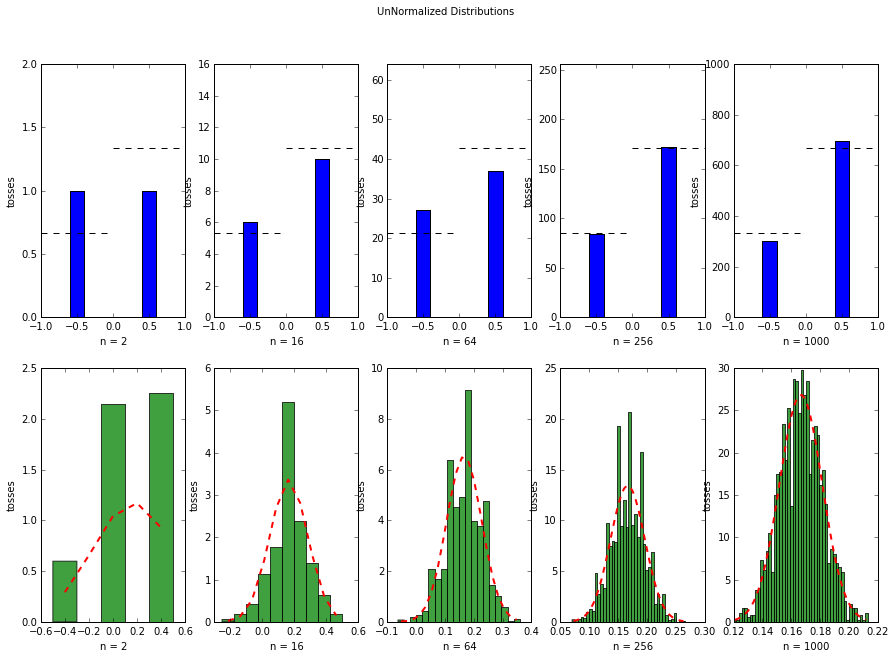

In [11]:
plt.figure(figsize=(15,10))
x = np.array([-0.5, 0.5])
plt.suptitle('UnNormalized Distributions')

ax1=plt.subplot(2,5,1)
bx1=plt.subplot(2,5,6)
tosses = 2
y = unfaircoin(tosses)
ax1=mkcmdbar(x, y, ax1, tosses)
bx1=mkhist(bx1, tosses, 5)

ax2=plt.subplot(2,5,2)
bx2=plt.subplot(2,5,7)
tosses = 16
y = unfaircoin(tosses)
ax2=mkcmdbar(x, y, ax2, tosses)
bx2=mkhist(bx2, tosses, 10)

ax3=plt.subplot(2,5,3)
bx3=plt.subplot(2,5,8)
tosses = 64
y = unfaircoin(tosses)
ax3=mkcmdbar(x, y, ax3, tosses)
bx3=mkhist(bx3, tosses, 20)

ax4=plt.subplot(2,5,4)
bx4=plt.subplot(2,5,9)
tosses = 256
y = unfaircoin(tosses)
ax4=mkcmdbar(x, y, ax4, tosses)
bx4=mkhist(bx4, tosses, 40)

ax5=plt.subplot(2,5,5)
bx5=plt.subplot(2,5,10)
tosses = 1000
y = unfaircoin(tosses)
ax5=mkcmdbar(x, y, ax5, tosses)
bx5=mkhist(bx5, tosses, 50)

the plot approaches a normal distribution.

<hr>
**5** Replot the histograms, removing the mean and normalizing by the standard deviation.  Also show the CDF for normal distribution with mean zero and standard deviation of 1.
<hr>

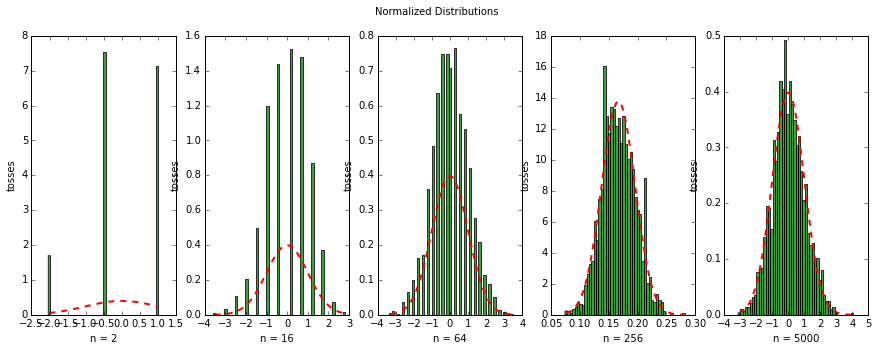

In [22]:
def mkhistwcdf(ax, tosses, buns):
    z = np.zeros(2000)
    for i in range(0,2000,1):
        z[i] = np.mean(unfaircoin(tosses)[2::1])
    z = (z-np.mean(z))/(np.std(z))
    n, bins, patches = ax.hist(z, buns, normed=1, facecolor='green', alpha=0.75)
    bincenters = 0.5*(bins[1:]+bins[:-1])
    # add a 'best fit' line for the normal PDF
    y = mlab.normpdf(bincenters, 0, 1)
    l = ax.plot(bincenters, y, 'r--', linewidth=2)
    ax.set_xlabel('n = '+str(tosses))
    ax.set_ylabel('tosses')
    return ax

plt.figure(figsize=(15,5))
x = np.array([-0.5, 0.5])
plt.suptitle('Normalized Distributions')

ax1=plt.subplot(1,5,1)
tosses = 2
ax1=mkhistwcdf(ax1, tosses, 50)

ax2=plt.subplot(1,5,2)
tosses = 16
ax2=mkhistwcdf(ax2, tosses, 50)

ax3=plt.subplot(1,5,3)
tosses = 64
ax3=mkhistwcdf(ax3, tosses, 50)

ax4=plt.subplot(1,5,4)
tosses = 256
ax4=mkhist(ax4, tosses, 50)

ax5=plt.subplot(1,5,5)
tosses = 5000
ax5=mkhistwcdf(ax5, tosses, 50)

As you can see, the histograms become more and more like that of a normal distribution.
This is an example of the central limit theorem, by summing many of the same probability distributions, the result will tend towards a Guassian, no matter what kind of probability distribution you use.

# Q3: Look at the Deep Cove weather data: 

There are two data sets, one with a sample every minute at 

`http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt`.

Download it locally, or use `genfromtxt` with the url as an argument.

The second is hourly data of the same station and a lot more.

`http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt`


In [13]:
minutedata = np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/MinuteData/DeepCoveNew.txt')[:,1]
hourdata = np.genfromtxt('http://web.uvic.ca/~jklymak/phy411/data/AllHourly.txt')[6,2:]
hourdata = hourdata[~np.isnan(hourdata)]
minutedata = minutedata[~np.isnan(minutedata)]

**1** Compare the normalized histograms of the two time series.  Also calculate the means and the standard deviations.
<hr>


minute mean: 	 	10.3016961717
minute varience: 	35.8238733916

hour mean: 	 	10.3387280591
hour varience: 		36.8172572917


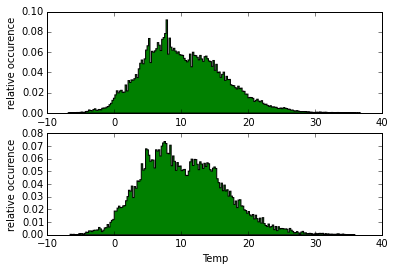

In [14]:
print "\nminute mean: \t \t" + str(np.mean(minutedata))
print "minute varience: \t" + str(np.var(minutedata)) + "\n"
print "hour mean: \t \t" + str(np.mean(hourdata))
print "hour varience: \t\t" + str(np.var(hourdata))

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
numBins = 200
ax.hist(minutedata,numBins,histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

ax = fig.add_subplot(2,1,2)
ax.hist(hourdata, numBins, histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

plt.show()

**2** Comment on the shape of these histograms.  Are they Normal?  Speculate as to why they have this shape.
<hr>

The histograms show a bimodal distribution in both the minutely and hourly sampled data sets. I suspect this is a result of a daytime value and a nighttime value.

<hr>
**3** Redo the histogram and the statistics with just the temperature at 3 PM (both time series start at midnight local time).
<hr>


3pm mean: 	11.0903119343
3pm varience: 	39.7159844224


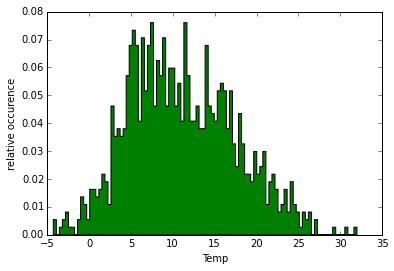

In [15]:
ThreePM = hourdata[15::24]
FiveAM = hourdata[5::24]

print "\n3pm mean: \t" + str(np.mean(ThreePM))
print "3pm varience: \t" + str(np.var(ThreePM))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
numBins = 100
ax.hist(ThreePM,numBins,histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

plt.show()

**4** Redo the histogram and the statistics with just the temperature at 5 AM (both time series start at midnight local time).


5am mean: 	10.0081319402
5am varience: 	35.8934114718


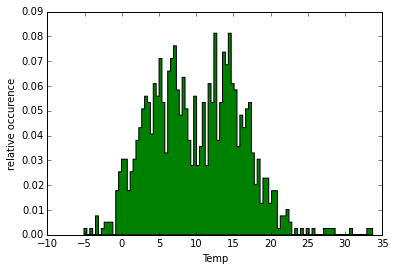

In [16]:
print "\n5am mean: \t" + str(np.mean(FiveAM))
print "5am varience: \t" + str(np.var(FiveAM))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(FiveAM, numBins, histtype='stepfilled', color='green', normed=True)
ax.set_xlabel('Temp')
ax.set_ylabel('relative occurence')

plt.show()